In [1]:
using CSV, DataFrames

In [2]:
include("src/SuStain.jl")

Main.SuStain

In [130]:
df_data = CSV.read("/Users/stivenr/Downloads/feobv_zdata.csv", DataFrame);
regions = ["occipital", "parietal", "temporal"]
df_reg = df_data[:,regions];
df_reg = df_reg .* (df_reg .>= 0)

Row,occipital,parietal,temporal
,Float64,Float64,Float64
1,1.86433,0.887064,0.393155
2,2.30478,2.16994,1.39263
3,1.54672,1.49268,0.867108
4,0.135416,-0.0,-0.0
5,-0.0,-0.0,-0.0
6,2.16123,1.71004,2.50635
7,1.39153,1.09326,0.645022
8,2.19054,0.32967,0.306801
9,2.02015,0.31997,-0.0


In [131]:
SuStain.gen_z_dict(df_reg, regions)

Dict{String, Vector{Float64}} with 3 entries:
  "temporal"  => [0.593505, 1.3625, 3.17885]
  "parietal"  => [0.758643, 1.52698, 3.34273]
  "occipital" => [1.03749, 1.93313, 3.08839]

In [132]:
dict_z = SuStain.gen_z_dict(df_reg, regions)

Dict{String, Vector{Float64}} with 3 entries:
  "temporal"  => [0.593505, 1.3625, 3.17885]
  "parietal"  => [0.758643, 1.52698, 3.34273]
  "occipital" => [1.03749, 1.93313, 3.08839]

In [133]:
dict_zmax = SuStain.gen_zmax_dict(df_reg, regions)

Dict{String, Float64} with 3 entries:
  "temporal"  => 3.92931
  "parietal"  => 4.51555
  "occipital" => 3.20468

In [135]:
N_stages = 3

3

In [136]:
vec_loglik, vec_tvec = SuStain.run_models(100, regions, df_reg, N_stages, dict_z, dict_zmax);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:21


In [137]:
ml_idx = argmax(vec_loglik)
vec_loglik[ml_idx]

-579.5287781374763

In [138]:
opt_tvec = vec_tvec[ml_idx]

Dict{String, Vector{Float64}} with 3 entries:
  "temporal"  => [0.438876, 0.66529, 0.743356]
  "parietal"  => [0.218299, 0.637518, 0.958067]
  "occipital" => [0.16976, 0.840771, 0.846805]

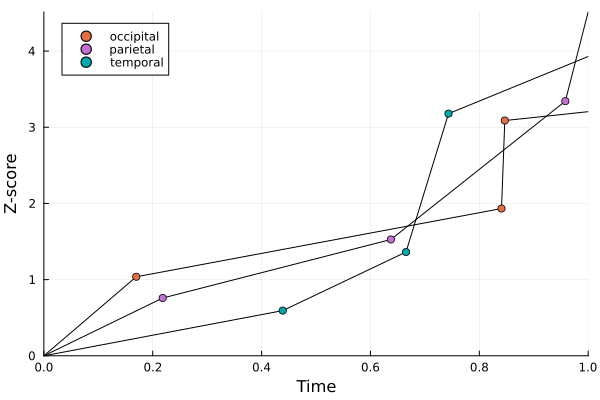

In [139]:
SuStain.plot_progression(opt_tvec, dict_z, dict_zmax, regions)